In [104]:
from pycirclize import Circos
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [105]:
subgroup = pd.read_csv(
    "/home/xutingfeng/ukb/ukbData/omics/metabolomics/subgroup.tsv", sep="\t"
)
subgroup["merge_key"] = subgroup["Description"].str.lower()
subgroup

,Abbreviation,Description,Subgroup,Group,merge_key
0,Ala,Alanine,Amino acids,Amino acids,alanine
1,Gln,Glutamine,Amino acids,Amino acids,glutamine
2,Gly,Glycine,Amino acids,Amino acids,glycine
3,His,Histidine,Amino acids,Amino acids,histidine
4,Ile,Isoleucine,Branched-chain amino acids,Amino acids,isoleucine
...,...,...,...,...,...
163,VLDL-L,Total lipids in VLDL,Total lipids,Total lipids,total lipids in vldl
164,HDL-TG,Triglycerides in HDL,Triglycerides,Triglycerides,triglycerides in hdl
165,LDL-TG,Triglycerides in LDL,Triglycerides,Triglycerides,triglycerides in ldl
166,Total-TG,Total triglycerides,Triglycerides,Triglycerides,total triglycerides


In [120]:
data = pd.read_csv(
    "/home/xutingfeng/ukb/project/chen/out/IschemicStroke_vs_metabolomics_INT.csv"
)
data["merge_key"] = data["query"].str.lower()

data["LOG10P"] = -np.log10(data["pval_corrected"])
data
data = data.merge(subgroup, on="merge_key", how="inner")
data

,query,key,beta,pvalue,N,N_case,N_control,pval_corrected,reject,merge_key,LOG10P,Abbreviation,Description,Subgroup,Group
0,Cholesterol in Medium VLDL,IschemicStroke,-0.240005,5.042708e-98,272764,7851,264913,4.106205e-97,True,cholesterol in medium vldl,96.386559,M-VLDL-C,Cholesterol in medium VLDL,Medium VLDL,Lipoprotein subclasses
1,Cholesterol in IDL,IschemicStroke,-0.277127,1.405826e-124,272764,7851,264913,1.201982e-122,True,cholesterol in idl,121.920102,IDL-C,Cholesterol in IDL,IDL,Lipoprotein subclasses
2,Cholesteryl Esters in Large LDL,IschemicStroke,-0.249175,1.284832e-103,272764,7851,264913,1.464709e-102,True,cholesteryl esters in large ldl,101.834249,L-LDL-CE,Cholesteryl esters in large LDL,Large LDL,Lipoprotein subclasses
3,Cholesteryl Esters in Large VLDL,IschemicStroke,-0.099043,7.898874e-17,272764,7851,264913,1.286388e-16,True,cholesteryl esters in large vldl,15.890628,L-VLDL-CE,Cholesteryl esters in large VLDL,Large VLDL,Lipoprotein subclasses
4,Cholesteryl Esters in Medium HDL,IschemicStroke,-0.138555,8.411956e-29,272764,7851,264913,1.616230e-28,True,cholesteryl esters in medium hdl,27.791497,M-HDL-CE,Cholesteryl esters in medium HDL,Medium HDL,Lipoprotein subclasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,Triglycerides in VLDL,IschemicStroke,-0.002808,8.150707e-01,272764,7851,264913,8.198653e-01,False,triglycerides in vldl,0.086258,VLDL-TG,Triglycerides in VLDL,Triglycerides,Triglycerides
164,Total Lipids in LDL,IschemicStroke,-0.234767,3.862862e-93,272764,7851,264913,2.540575e-92,True,total lipids in ldl,91.595068,LDL-L,Total lipids in LDL,Total lipids,Total lipids
165,Total Lipids in Small HDL,IschemicStroke,-0.095385,2.557613e-16,272764,7851,264913,4.125961e-16,True,total lipids in small hdl,15.384475,S-HDL-L,Total lipids in small HDL,Small HDL,Lipoprotein subclasses
166,Triglycerides in Large LDL,IschemicStroke,0.015186,2.028190e-01,272764,7851,264913,2.237551e-01,False,triglycerides in large ldl,0.650227,L-LDL-TG,Triglycerides in large LDL,Large LDL,Lipoprotein subclasses


<Axes: xlabel='beta', ylabel='Density'>

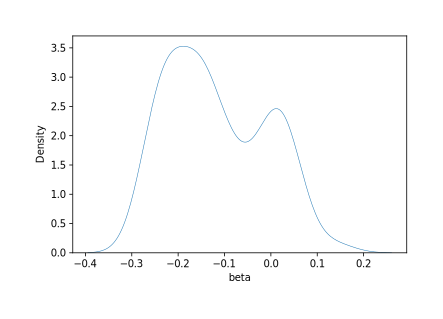

In [121]:
import seaborn as sns

sns.kdeplot(data["beta"])

In [122]:
subgroup_order = [
    "Amino acids",
    "Branched-chain amino acids",
    "Aromatic amino acids",
    "Fluid balance",
    "Inflammation",
    "Fatty acids",
    "Glycolysis related metabolites",
    "Ketone bodies",
    "Total lipids",
    "Cholesterol",
    "Free cholesterol",
    "Cholesteryl esters",
    "Phospholipids",
    "Triglycerides",
    "Other lipids",
    "Lipoprotein particle sizes",
    "Lipoprotein particle concentrations",
    "Chylomicrons and extremely large VLDL",
    "Very large VLDL",
    "Large VLDL",
    "Medium VLDL",
    "Small VLDL",
    "Very small VLDL",
    "Large LDL",
    "Medium LDL",
    "Small LDL",
    "IDL",
    "Very large HDL",
    "Large HDL",
    "Medium HDL",
    "Small HDL",
    "Apolipoproteins",
]

In [123]:
sectors = data.groupby("Subgroup").apply(lambda x: x.shape[0]).to_dict()
sectors

{'Amino acids': 4,
 'Apolipoproteins': 2,
 'Aromatic amino acids': 2,
 'Branched-chain amino acids': 4,
 'Cholesterol': 7,
 'Cholesteryl esters': 4,
 'Chylomicrons and extremely large VLDL': 7,
 'Fatty acids': 9,
 'Fluid balance': 2,
 'Free cholesterol': 4,
 'Glycolysis related metabolites': 4,
 'IDL': 7,
 'Inflammation': 1,
 'Ketone bodies': 4,
 'Large HDL': 7,
 'Large LDL': 7,
 'Large VLDL': 7,
 'Lipoprotein particle concentrations': 4,
 'Lipoprotein particle sizes': 3,
 'Medium HDL': 7,
 'Medium LDL': 7,
 'Medium VLDL': 7,
 'Other lipids': 4,
 'Phospholipids': 4,
 'Small HDL': 7,
 'Small LDL': 7,
 'Small VLDL': 7,
 'Total lipids': 4,
 'Triglycerides': 4,
 'Very large HDL': 7,
 'Very large VLDL': 7,
 'Very small VLDL': 7}

In [163]:
from pycirclize.track import Track
from pycirclize import utils
from matplotlib.projections.polar import PolarAxes


def Add_track_text(
    Track: Track,
    text: str,
    x: float | None = None,
    r: float | None = None,
    *,
    adjust_rotation: bool = True,
    orientation: str = "horizontal",
    ignore_range_error: bool = False,
    outer: bool = True,
    only_rotation: bool = False,
    **kwargs,
) -> None:
    """Plot text

    This func add outer and only_rotation params from Track.text functions; this supports for text rotation calculation.

    Parameters
    ----------
    text : str
        Text content
    x : float | None, optional
        X position. If None, track center x position is set.
    r : float | None, optional
        Radius position. If None, track center radius position is set.
    adjust_rotation : bool, optional
        If True, text rotation is auto set based on `x` and `orientation` params.
    orientation : str, optional
        Text orientation (`horizontal` or `vertical`)
        If adjust_rotation=True, orientation is used for rotation calculation.
    ignore_range_error : bool, optional
        If True, ignore x position range error
        (ErrorCase: `not track.start <= x <= track.end`)
    **kwargs : dict, optional
        Text properties (e.g. `size=12, color="red", va="center", ...`)
        <https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html>
    """
    # If value is None, center position is set.
    x = Track.center if x is None else x
    r = Track.r_center if r is None else r

    rad = Track.x_to_rad(x, ignore_range_error)
    if adjust_rotation:
        params = utils.plot.get_label_params_by_rad(
            rad, orientation, only_rotation=only_rotation, outer=outer
        )
        kwargs.update(params)

    if "ha" not in kwargs and "horizontalalignment" not in kwargs:
        kwargs.update(dict(ha="center"))
    if "va" not in kwargs and "verticalalignment" not in kwargs:
        kwargs.update(dict(va="center"))

    def plot_text(ax: PolarAxes) -> None:
        ax.text(rad, r, text, **kwargs)

    Track._plot_funcs.append(plot_text)


def save_fig(fig=None, path=None, bbox_inches="tight", dpi=400, **kwargs):
    if path is None:
        path = "temp"
    if fig is None:
        fig = plt.gcf()
    Path(path).parent.mkdir(parents=True, exist_ok=True)

    fig.savefig(f"{path}.png", dpi=400, **kwargs)
    fig.savefig(f"{path}.pdf", dpi=400, **kwargs)
    fig.savefig(f"{path}.svg", dpi=400, **kwargs)
    plt.close(fig)

In [164]:
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

from pycirclize import Circos
import numpy as np
from matplotlib.lines import Line2D

np.random.seed(0)
gap = 1
plt_data = data
total = plt_data.shape[0]

group_in_name = "Abbreviation"
groupby = "Subgroup"
group_order = subgroup_order
scatter_y = "beta"
scatter_marker_hue = "reject"
scatter_marker_hue_marker = {
    True: "o",
    False: "X",
}

plt_data[groupby] = (
    plt_data[groupby].astype("category").cat.set_categories(group_order, ordered=True)
)

vmin = plt_data["beta"].min()
vmax = plt_data["beta"].max()
sectors = (
    plt_data.groupby(groupby)
    .apply(lambda x: int(365 * max(x.shape[0] - gap, 1) / total))
    .to_dict()
)

track_r = [100, 80, 60]
track_fontsize = [10, 7]

circos = Circos(sectors, space=4)
circos.text("IschemicStroke", size=15)
circos.line(r=40, color="grey", lw=2, alpha=.8)
for sector in circos.sectors:
    track_data = plt_data[plt_data[groupby] == sector.name].sort_values("beta")

    # laber track
    label_track = sector.add_track((track_r[0], track_r[0]))
    Add_track_text(
        label_track,
        sector.name,
        x= sector.center,
        # text = "123",
        r = track_r[0] + 1,
        color="black",
        fontsize=track_fontsize[0],
        # ha='left',
        # va='bottom',
        orientation="vertical",
        adjust_rotation=True,
        fontweight="bold",
    )
    label_track.axis(ec='grey')

    # each subgroup
    subgroup_data = track_data[group_in_name].tolist()
    num_group_in_name = len(subgroup_data)
    group_in_name_track = sector.add_track((track_r[1], track_r[1]))
    group_in_name_track.axis(ec='grey')
    group_in_name_track_x = np.linspace(0, group_in_name_track.size, num_group_in_name)
    for i, group in enumerate(subgroup_data):
        Add_track_text(
            group_in_name_track,
            group,
            x=group_in_name_track_x[i],
            r=track_r[1],
            color="black",
            fontsize=track_fontsize[1],
            fontweight="bold",
            orientation="vertical",
            adjust_rotation=True,
        )

    # pvalue scatter track 
    scatter_track = sector.add_track((50, 70))
    scatter_track.axis(visible=False)


    x = np.linspace(0, group_in_name_track.size, num_group_in_name)
    y = track_data["beta"].values

    scatter_df_dict = {
        "x": x,
        "y": y,
    }
    if scatter_marker_hue:
        hue = track_data[scatter_marker_hue].values
        scatter_df_dict["hue"] = hue

    scatter_df = pd.DataFrame(scatter_df_dict)

    if scatter_marker_hue:
        
        for scatter_marker_hue_name, scatter_marker_hue_df in scatter_df.groupby("hue"):

            scatter_makrer_hue_marker = scatter_marker_hue_marker[scatter_marker_hue_name]
            scatter_track.scatter(
                x = scatter_marker_hue_df["x"].values,
                y = scatter_marker_hue_df["y"].values,
                vmin = vmin,
                vmax = vmax,
                s=20,
                cmap = "RdBu_r",
                c = scatter_marker_hue_df["y"].values,
                norm = plt.Normalize(vmin, vmax),
                label = scatter_marker_hue_name,
                marker = scatter_makrer_hue_marker,
            )


    else:
        scatter_track.scatter(
            x = scatter_df["x"].values,
            y = scatter_df["y"].values,
            vmin = vmin,
            vmax = vmax,
            s=20,
            cmap = "RdBu_r",
            c = y.values,
            norm = plt.Normalize(vmin, vmax),
        )
    median = scatter_track._y_to_r(0, vmin, vmax)
    circos.line(
        r= median,

        color="grey",
        linestyle="-",
        lw=.5,
        alpha=0.5,
    )
    # scatter_track.line(x=[0, group_in_name_track.size], y=[0, 0], color="grey", linestyle="-", vmin=vmin, vmax=vmax, lw=2, alpha=.5)

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))


if scatter_marker_hue:
    ## plot legend 
    scatter_handels = [
        Line2D([], [], color="orange", marker=scatter_makrer_hue_marker, label=scatter_marker_hue_name, ms=6, ls="None") for scatter_marker_hue_name, scatter_makrer_hue_marker in scatter_marker_hue_marker.items()
    ]

scatter_legend = ax.legend(
    handles=scatter_handels,
    bbox_to_anchor=(0.93, 0.98),
    fontsize=8,
    title="Significant",
    handlelength=2,
)

circos.colorbar(
    # bounds=(0.93, 0.98, 0.4, 0.03),
    bounds=(0.96, 0.98, 0.02, 0.3),
    vmin=vmin,
    vmax=vmax,
    cmap="RdBu_r",
    # orientation="horizontal",
    # colorbar_kws=dict(label="Colorbar in center"),
    # tick_kws=dict(labelsize=12, colors="red"),
)
fig = circos.plotfig(ax=ax)

save_fig(fig, "IschemicStroke_vs_metabolomics_INT")

/tmp/ipykernel_28346/3179946027.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


False
True


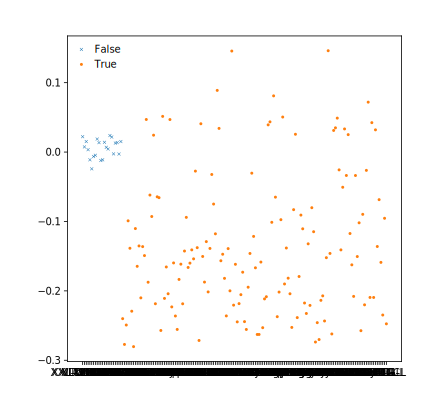

In [126]:
fig, ax = plt.subplots(figsize=(6, 6))

# plt_data["reject"].map({True: "o", False: "x"})

for name, df in plt_data.groupby("reject"):
    print(name)
    ax.scatter(
        df["Abbreviation"], df["beta"], label=name, marker={True: "o", False: "x"}[name]
    )
ax.legend()

In [118]:
plt_data["reject"].value_counts()

False    168
Name: reject, dtype: int64

In [53]:
from torch.nn import functional as F
import torch

activation = "jiangwu"
activation_func = F.__dict__[activation]

activation_func(torch.tensor([1.0]))

KeyError: 'jiangwu'

In [ ]:
nn.ReLU